# Face detection using open cv
I want to try face detection with haar cascade.

In [32]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time as t
import matplotlib.patches as patches
#%matplotlib inline

#plt.rcParams["figure.figsize"] = [160, 120]


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
assert(face_cascade.empty() == False)

image dimensions:(415, 700, 3)


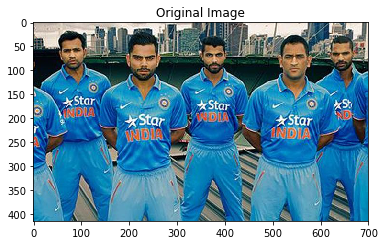

In [39]:
img = cv2.imread('D:\\samples\\data_science\\image_processing\\team_india.jpg', cv2.IMREAD_ANYCOLOR)
#opencv reads in BGR format, let us convert to RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print('image dimensions:'+str(img.shape))

showImageMatPlt(img, 'Original Image', False)

## Detecting faces using haar cascade
Below code shows the usage of haar cascade to detect faces

Experirementing with gray vs color clearly shows detecting faces in gray has huge performance gain.

In [40]:

#let us try detecting faces using color image as is
t1 = t.time()
faces_color = face_cascade.detectMultiScale(img, 1.3, 5)
t2 = t.time()
print('Time elapsed in face detection in a color image:'+str((t2-t1)*1000)+' ms. Faces detected:'+str(faces_color.shape[0]))
t0 = t.time()
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
t1 = t.time()
faces_gray = face_cascade.detectMultiScale(img_gray, 1.3, 5)
t2 = t.time()
print('Time elapsed for color to gray:' + str((t1-t0)*1000))
print('Time elapsed in face detection in a gray image:'+str((t2-t1)*1000)+' ms.' + 'Faces detected:'+str(faces_gray.shape[0]))

Time elapsed in face detection in a color image:70.00398635864258 ms. Faces detected:5
Time elapsed for color to gray:0.0
Time elapsed in face detection in a gray image:46.00262641906738 ms.Faces detected:5


### highlight the detected faces with rectangles 

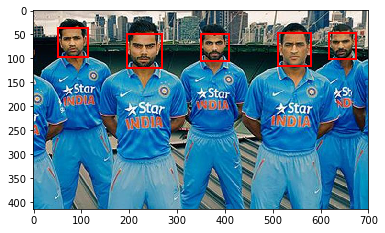

In [41]:
#display_image_in_actual_size(img, 'detected faces with color image', faces_color)
plt.figure(figsize=(1000, 626))
# Create figure and axes
fig1, ax = plt.subplots(1)
# Display the image
ax.imshow(img)

for (x,y,w,h) in faces_color:    
    # Create a Rectangle patch
    rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()